# Import and Pick Session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dataset import *
from constraints import *

import warnings
warnings.filterwarnings('ignore')

# Get data for our stimulus 
STIMULI = ['static_gratings', 'drifting_gratings']
REGIONS = ['VISp', 'DG', 'LGd', 'APN']

df = get_annotated_spike_times(session=CACHE.get_session_data(CURRENT_SESSION_ID), 
                               stimulus_name=ISIN(STIMULI),
                               structure_acronym=ISIN(REGIONS))
print(f'There are {len(df)} rows in the dataset.')

/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because vers

There are 1523191 rows in the dataset.


# EDA

For this study, we analyzed a subsets of the 750332458 session dataset to investigate how different regions of the mouse brain respond to distinct visual stimuli. We focused on static and drifting gratings, as they are similar in nature but differ enough to potentially produce different neural responses. To examine regional differences in activity, we selected brain areas from the visual cortex, the hippocampus, the thalamus, and the midbrain region. Within the visual cortex, we chose the ___________.

Let's start with a general overview of the data.

In [9]:
df.describe()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset,start_time,stop_time,duration,stimulus_condition_id,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,...,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,ecephys_structure_id,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_sampling_rate,probe_lfp_sampling_rate
count,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,...,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,1.523191e+06,424273.000000,424273.000000,424273.000000,1.523191e+06,1.523191e+06
mean,4.541791e+04,9.518138e+08,4.988895e-01,5.678053e+03,5.679062e+03,1.009886e+00,2.859177e+03,4.638325e-01,1.384242e+02,2.220812e-02,...,1.986945e+02,3.139315e+01,7.579046e+08,2.001458e+03,3.632302e+02,8111.748419,3577.102568,8362.230024,2.999998e+04,1.249999e+03
std,2.074613e+04,3.033418e+03,5.819865e-01,2.363826e+03,2.363105e+03,8.680056e-01,2.269654e+03,2.018802e-01,5.820907e+01,2.975327e-02,...,9.220006e+01,2.033740e+01,1.793127e+00,9.221317e+02,1.311656e+02,161.563051,275.948808,221.169802,3.317203e-02,1.382168e-03
min,3.798000e+03,9.518087e+08,7.471681e-07,1.585648e+03,1.587649e+03,2.501888e-01,2.460000e+02,6.022507e-02,2.621795e+01,7.623134e-06,...,2.900000e+01,1.100000e+01,7.579046e+08,3.000000e+02,1.700000e+02,7995.000000,3054.000000,8204.000000,2.999992e+04,1.249997e+03
25%,3.114300e+04,9.518094e+08,9.109096e-02,3.603333e+03,3.605335e+03,2.502087e-01,2.690000e+02,3.293696e-01,9.264333e+01,2.289311e-03,...,1.210000e+02,1.100000e+01,7.579046e+08,1.220000e+03,3.850000e+02,8006.000000,3702.000000,8219.000000,2.999992e+04,1.249997e+03
50%,5.016700e+04,9.518155e+08,1.954349e-01,5.582236e+03,5.582487e+03,2.502162e-01,4.798000e+03,4.789286e-01,1.269393e+02,5.775624e-03,...,2.480000e+02,2.700000e+01,7.579046e+08,2.500000e+03,3.850000e+02,8029.000000,3711.000000,8248.000000,3.000000e+04,1.250000e+03
75%,5.663100e+04,9.518157e+08,8.403667e-01,7.559171e+03,7.559421e+03,2.001670e+00,4.852000e+03,5.758825e-01,1.694560e+02,4.370427e-02,...,2.560000e+02,5.900000e+01,7.579046e+08,2.580000e+03,3.850000e+02,8033.000000,3767.000000,8253.000000,3.000000e+04,1.250000e+03
max,7.038900e+04,9.518170e+08,2.001698e+00,9.151752e+03,9.152002e+03,2.001740e+00,4.907000e+03,1.784530e+00,3.041895e+02,9.614069e-02,...,2.970000e+02,5.900000e+01,7.579046e+08,2.980000e+03,7.260000e+02,8417.000000,3796.000000,8777.000000,3.000000e+04,1.250000e+03


In [10]:
df.columns

Index(['stimulus_presentation_id', 'unit_id',
       'time_since_stimulus_presentation_onset', 'stimulus_block',
       'start_time', 'stop_time', 'x_position', 'size', 'frame', 'color',
       'y_position', 'stimulus_name', 'temporal_frequency', 'contrast',
       'orientation', 'spatial_frequency', 'phase', 'duration',
       'stimulus_condition_id', 'waveform_PT_ratio', 'waveform_amplitude',
       'amplitude_cutoff', 'cluster_id', 'cumulative_drift', 'd_prime',
       'firing_rate', 'isi_violations', 'isolation_distance', 'L_ratio',
       'local_index', 'max_drift', 'nn_hit_rate', 'nn_miss_rate',
       'peak_channel_id', 'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecep

There are 41 columns capturing information about the neural response to the stimulus presentation, such as stimulus characteristics, neural unit responses, waveform features, probe position, and location in the brain. The unique identifier for this table, the `unit_id` represents the neural unit. Since there is no guarantee that a single neuron is measured, the neural unit represents single or multiple neurons.

### Neural Response & Quality Metrics

The data, by default, is already filtered with appropriate values for `isi_violations`, `amplitude_cutoff`, `presence_ratio`. These variables measure the refractory period violations, the proportion of missed spikes, and the fraction of the time that the unit is detected throughout the recording respectively. 

In addition to this, there are other metrics which help to understand the quality of our data such as: `firing_rate`, `snr`, `isolation_distance`, `d_prime`, `nn_hit_rate`/`nn_miss_rate`. The Allen Brain Observatory provides the boxplots for these metrics to contextualize our results. Finally, we have `L_ratio`, `local_index`, `cluster_id`, and `filtering` which provide details on the quality of the recorded response.

### Waveform Features

This next group of variables describe the shape and properties of the spike waveforms:

`waveform_PT_ratio`: Peak-to-trough amplitude ratio.

`waveform_amplitude`: Amplitude of the waveform.

`waveform_duration`: Duration of the spike waveform.

`waveform_recovery_slope`: Slope after the waveform trough (recovery phase).

`waveform_repolarization_slope`: Slope leading to the trough.

`waveform_spread`: Spatial extent of waveform across electrodes.

`waveform_velocity_above`, `waveform_velocity_below`: Velocity of waveform propagation.

### Stimulus Presentation Info

The dataset includes the `stimulus_presentation_id` and `stimulus_name` which we've filtered to be *static_gratings* and *drifting_gratings*. For each stimulus, we get information on its `orientation`, `phase`, `contrast`, `size`, and `duration`. The `temporal_frequency` and `spatial_frequency` are also available.

### Probe & Recording Info

Probes are the apparatus used to record the neural responses. The unique identifier is the `probe_id`, and there is also a `probe_description`. Some more info:

`probe_channel_number`: Channel on the probe.

`peak_channel_id`: Channel with peak unit activity.

`probe_horizontal_position`, `probe_vertical_position`: Position on the probe grid.

`probe_sampling_rate`, `probe_lfp_sampling_rate`: Sampling rates (for spikes and LFPs).

`probe_has_lfp_data`: Boolean, whether local field potential data is available.


### Anatomical Mapping

These columns link the recorded neural data to the anatomical regions in the Allen Common Coordinate Framework (CCF), allowing mapping to specific brain structures and 3D spatial localization:

`structure_acronym`: Acronym of the brain structure.

`ecephys_structure_acronym`: Brain structure acronym aligned with electrophysiology data.

`ecephys_structure_id`: Integer ID for the brain region.

`anterior_posterior_ccf_coordinate`: Position along the anterior-posterior axis (µm).

`dorsal_ventral_ccf_coordinate`: Position along the dorsal-ventral axis (µm).

`left_right_ccf_coordinate`: Position along the left-right axis (µm).

`location`: Text label of the anatomical location (may combine region and layer).

### Temporal Tracking & Drift

These final features track when recordings occurred and how stable the recording was across time:

`start_time`, `stop_time`: Start and stop times of the stimulus or recording window (relative to session start).

`cumulative_drift`: Total drift in unit position over the session (likely due to tissue movement).

`max_drift`: Maximum displacement observed for the unit during recording.

## Checking Quality Metrics

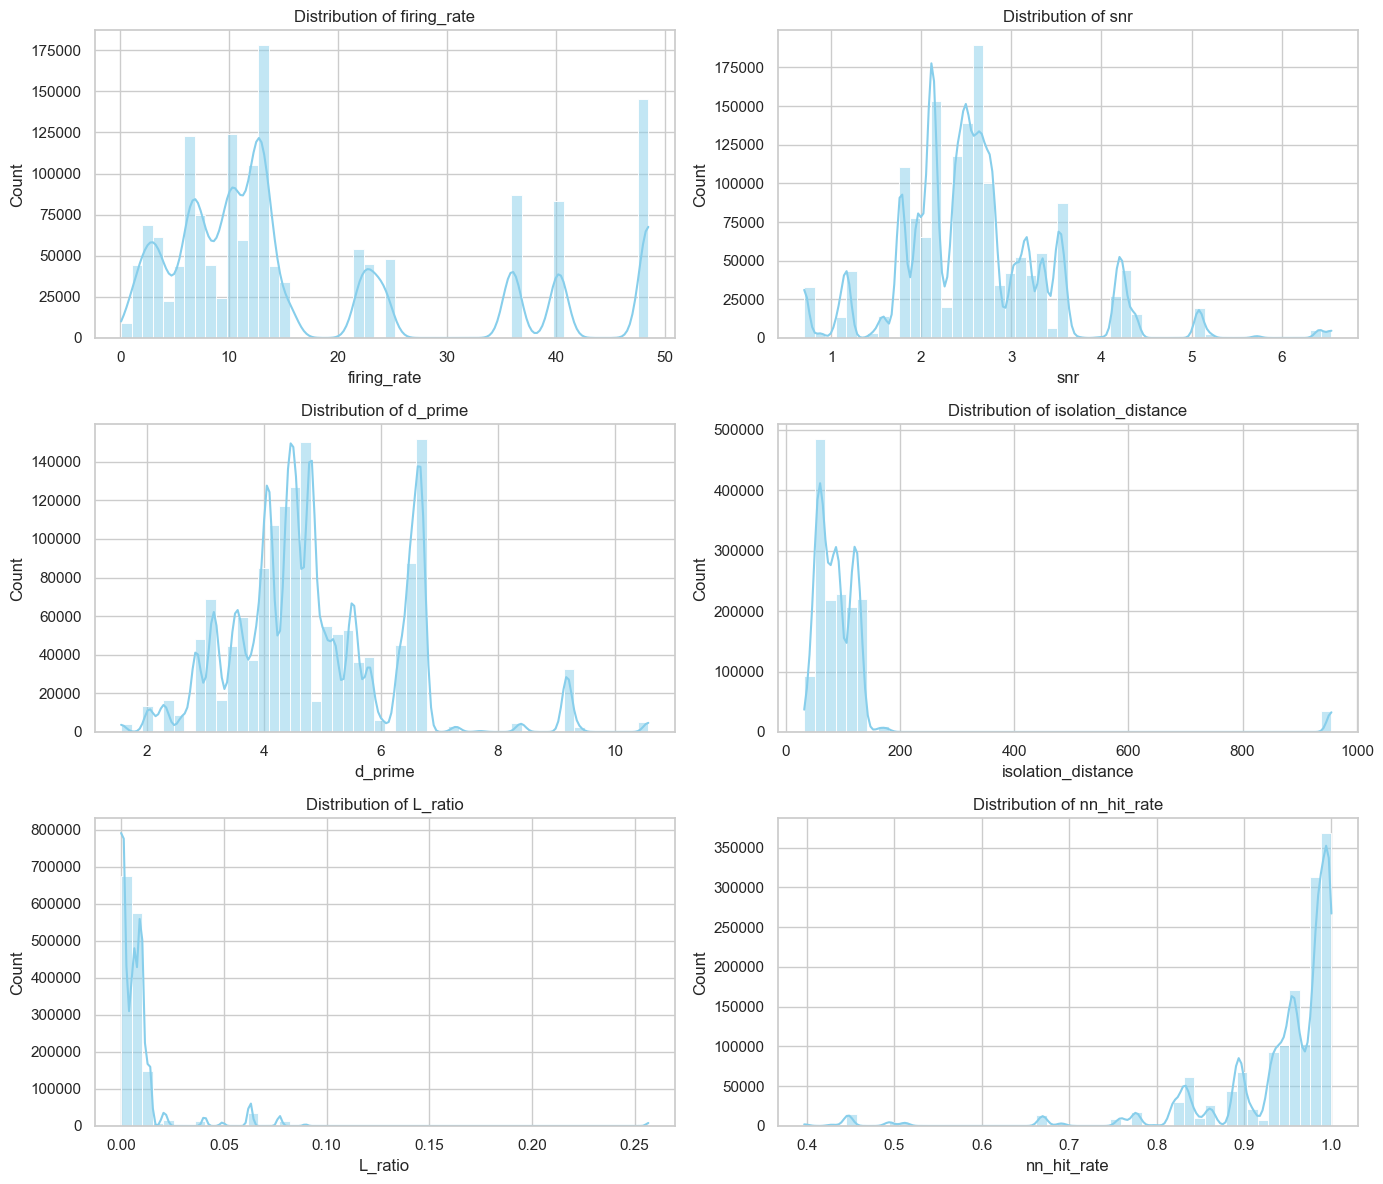

In [11]:
# List of quality metrics
quality_metrics = [
    'firing_rate', 'snr', 'd_prime',
    'isolation_distance', 'L_ratio', 'nn_hit_rate'
]

# Set seaborn style
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, metric in enumerate(quality_metrics):
    ax = axes[i]
    sns.histplot(
        x=df[metric].reset_index(drop=True),
        kde=True, 
        bins=50, 
        color="skyblue",
        ax=ax
    )
    ax.set_title(f"Distribution of {metric}")
    ax.set_xlabel(metric)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


From these distribution plots, we can see that there are some values that may be outliers in our data. Since these values represent quality metrics for our recordings, it is best we remove the values which be outliers. We will do this by removing any value that is over/under 3 standard deviations greater than the column mean.

In [12]:
k = 4

# compute mean and std
df_means = df[quality_metrics].mean()
df_std_devs = df[quality_metrics].std()

# identify rows
outliers = ((df[quality_metrics] - df_means).abs() > (k * df_std_devs)).any(axis=1)

# remove rows with any outliers
df_regular = df[~outliers]

print(outliers.sum(), "outliers are excluded based on quality metrics.")

72204 outliers are excluded based on quality metrics.


## Visualizing Waveform Features

Next we will analyze waveform features from different perspectives. For each waveform feature--such as amplitude, duration, spread--we will create a histogram and a violin plot. These visualizations will help us undestand the spread, central tendency, and overall distribution of the waveform data. 

In addition to global distributions, we will perform a regional analysis of waveform features. We will explore amplitude variations across different brain regions using boxplots grouped by brain area. This will allow us to identify potential differences in neural activity patterns across anatomical structures in our neural responses.

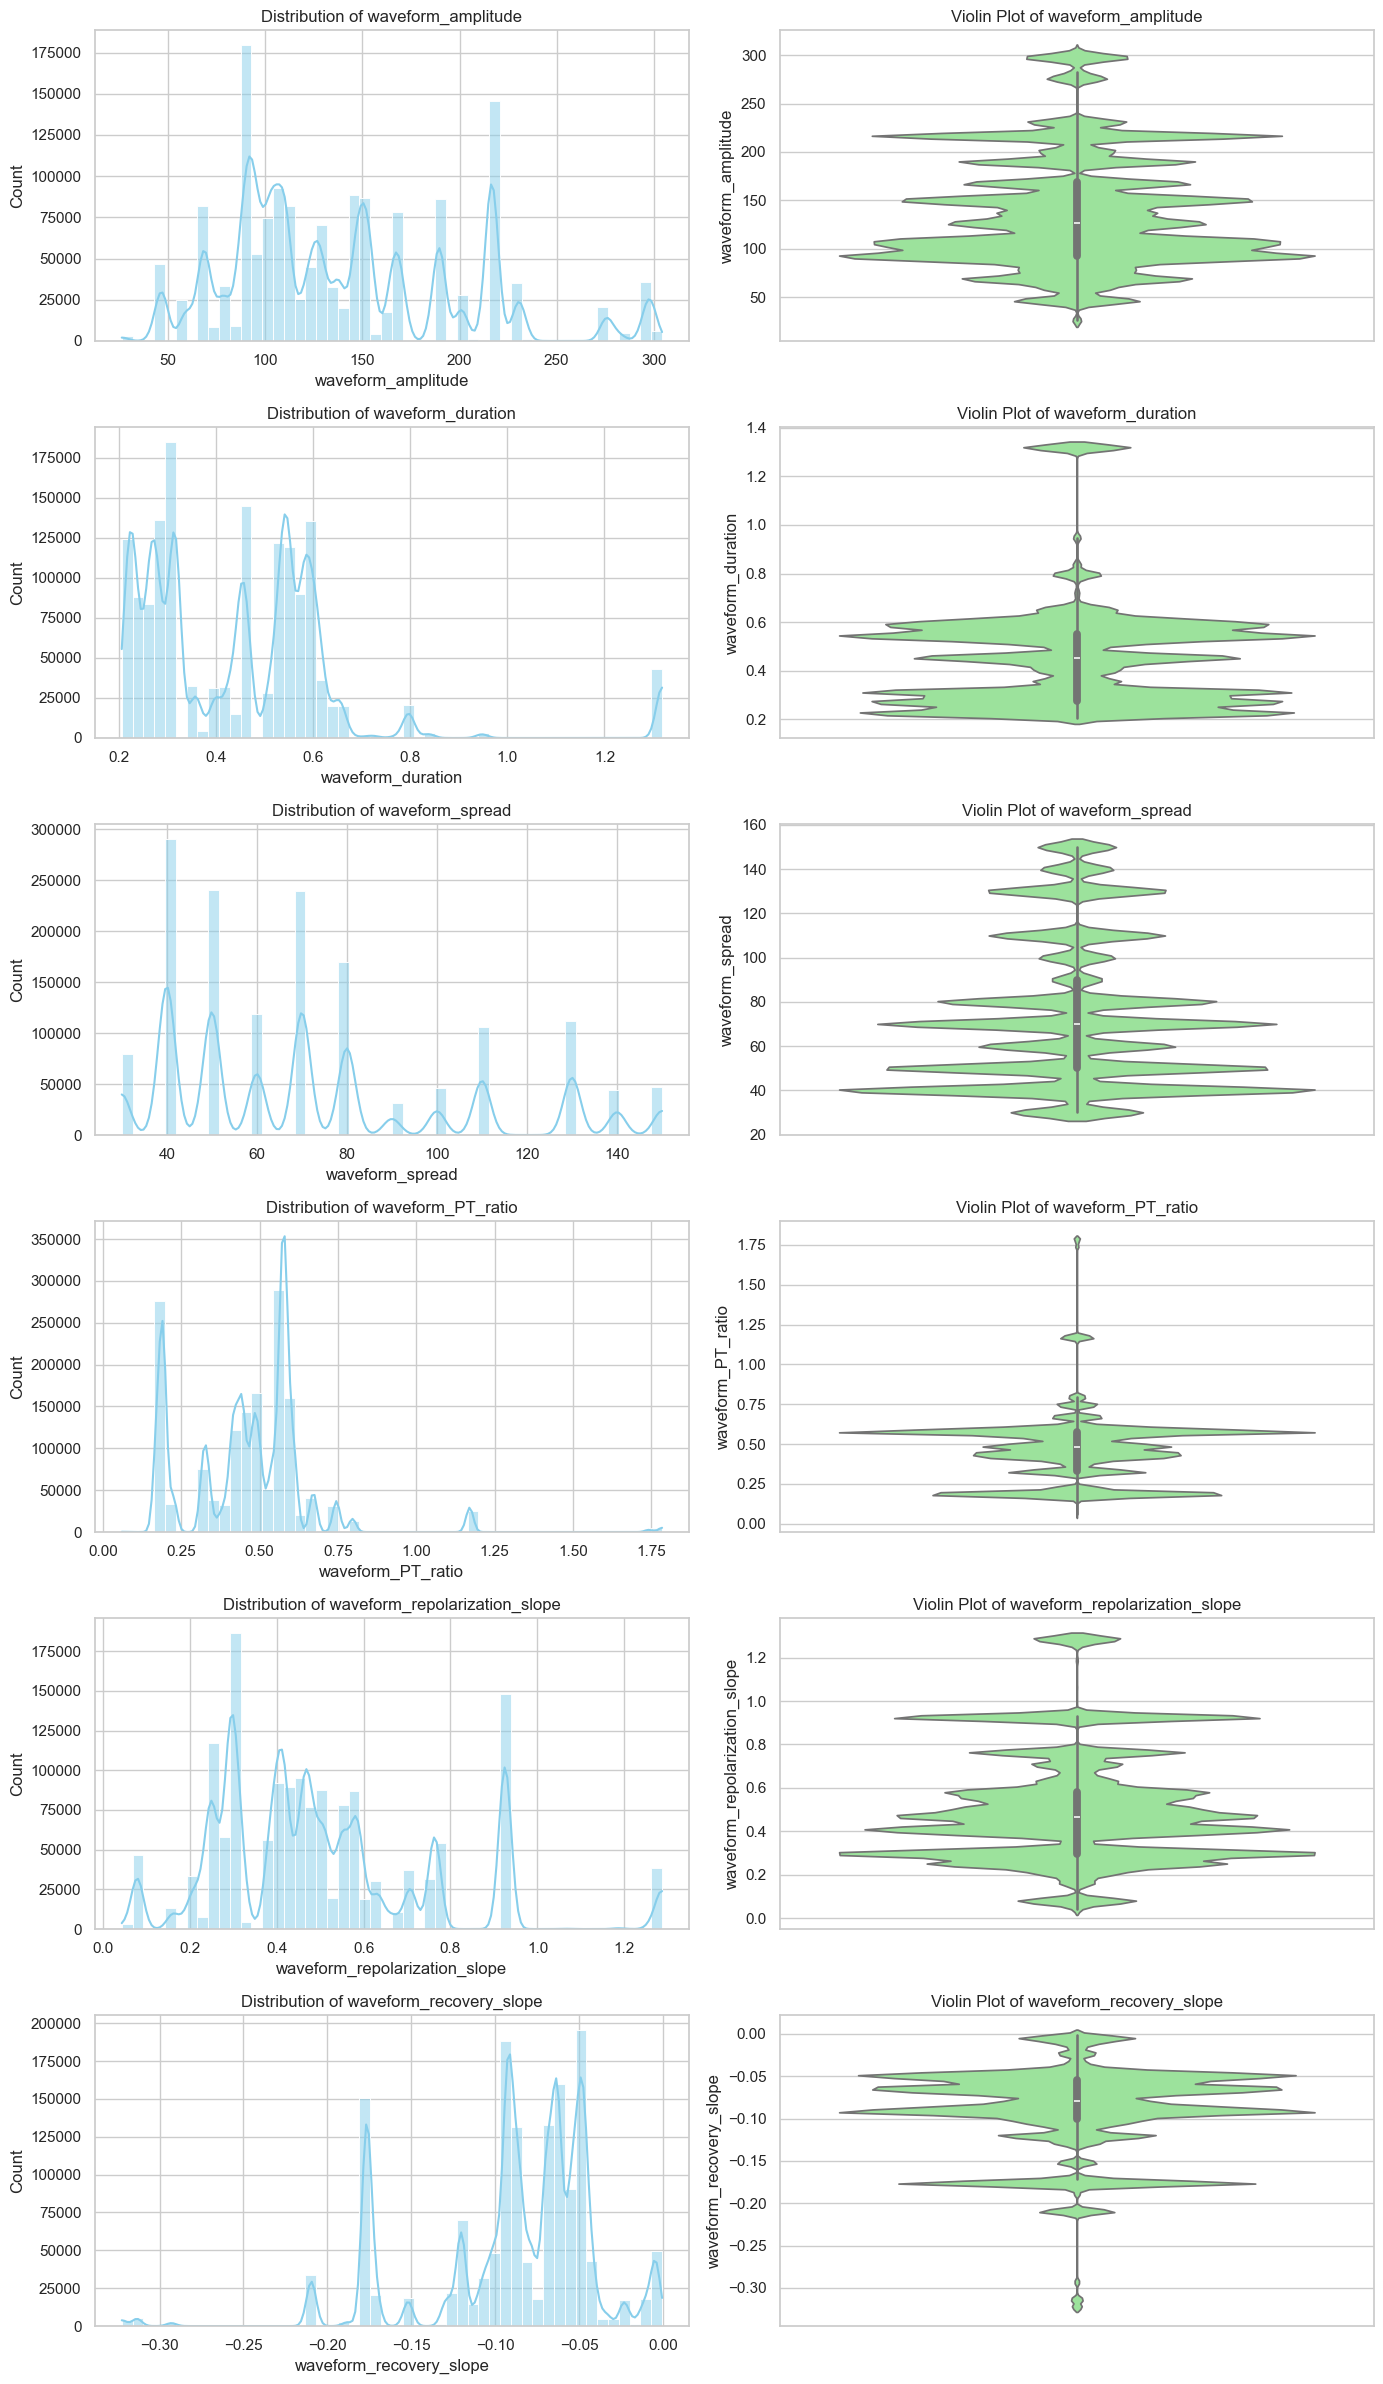

In [13]:
waveform_features = [
    'waveform_amplitude', 'waveform_duration', 'waveform_spread',
    'waveform_PT_ratio', 'waveform_repolarization_slope',
    'waveform_recovery_slope'
]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 24))
axes = axes.flatten()

for i, feature in enumerate(waveform_features):
    ax_hist = axes[i*2]
    sns.histplot(
        data=df,
        x=feature,
        kde=True, 
        bins=50, 
        color='skyblue',
        ax=ax_hist)
    ax_hist.set_title(f"Distribution of {feature}")
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Count")

    ax_violin = axes[i*2+1]
    sns.violinplot(data=df, 
                   y=feature, 
                   color='lightgreen',
                   ax=ax_violin)
    ax_violin.set_title(f"Violin Plot of {feature}")

plt.tight_layout()
plt.show()

`waveform_amplitude`

- The amplitude distribution shows multiple peaks (multimodal), with a spike at around 100. The violin plot confirms this multimodality, with some distinct clusters at various amplitude values. The data spans approximately 25-300 in amplitude values, with most values concentrated between 50 and 225.

`waveform_duration`

- The duration distribution is also multimodal with a few major peaks that can be seen in both plots. The data is concentrated between 0.2 and 0.6 seconds, with a small proportion of values also been located past 1.2 seconds. 

`waveform_spread`

- The spread distribution shows a more periodic peak structure, with intervals of around 15-20 units. There are some peaks in the lower values, but the multiple density clusters go from 20-150.

`waveform_PT_ratio`

- The PT ratio distribution has a significant peak at ~0.55, and the violin plot shows a concentration of values at 0.2-0.7 range.

`waveform_repolarization_slope`

- The repolarization slope distribution is concentrated between 0.2 and 0.8, with a reemergence at 1 and past 1.2.

`waveform_recovery_slope`

- The recovery slope distribution is concentrated between -0.15 and 0.


The multimodality in distribution leads us to believe there are natural clusters in the dataset, in the next section, we will be exploring and testing this belief.

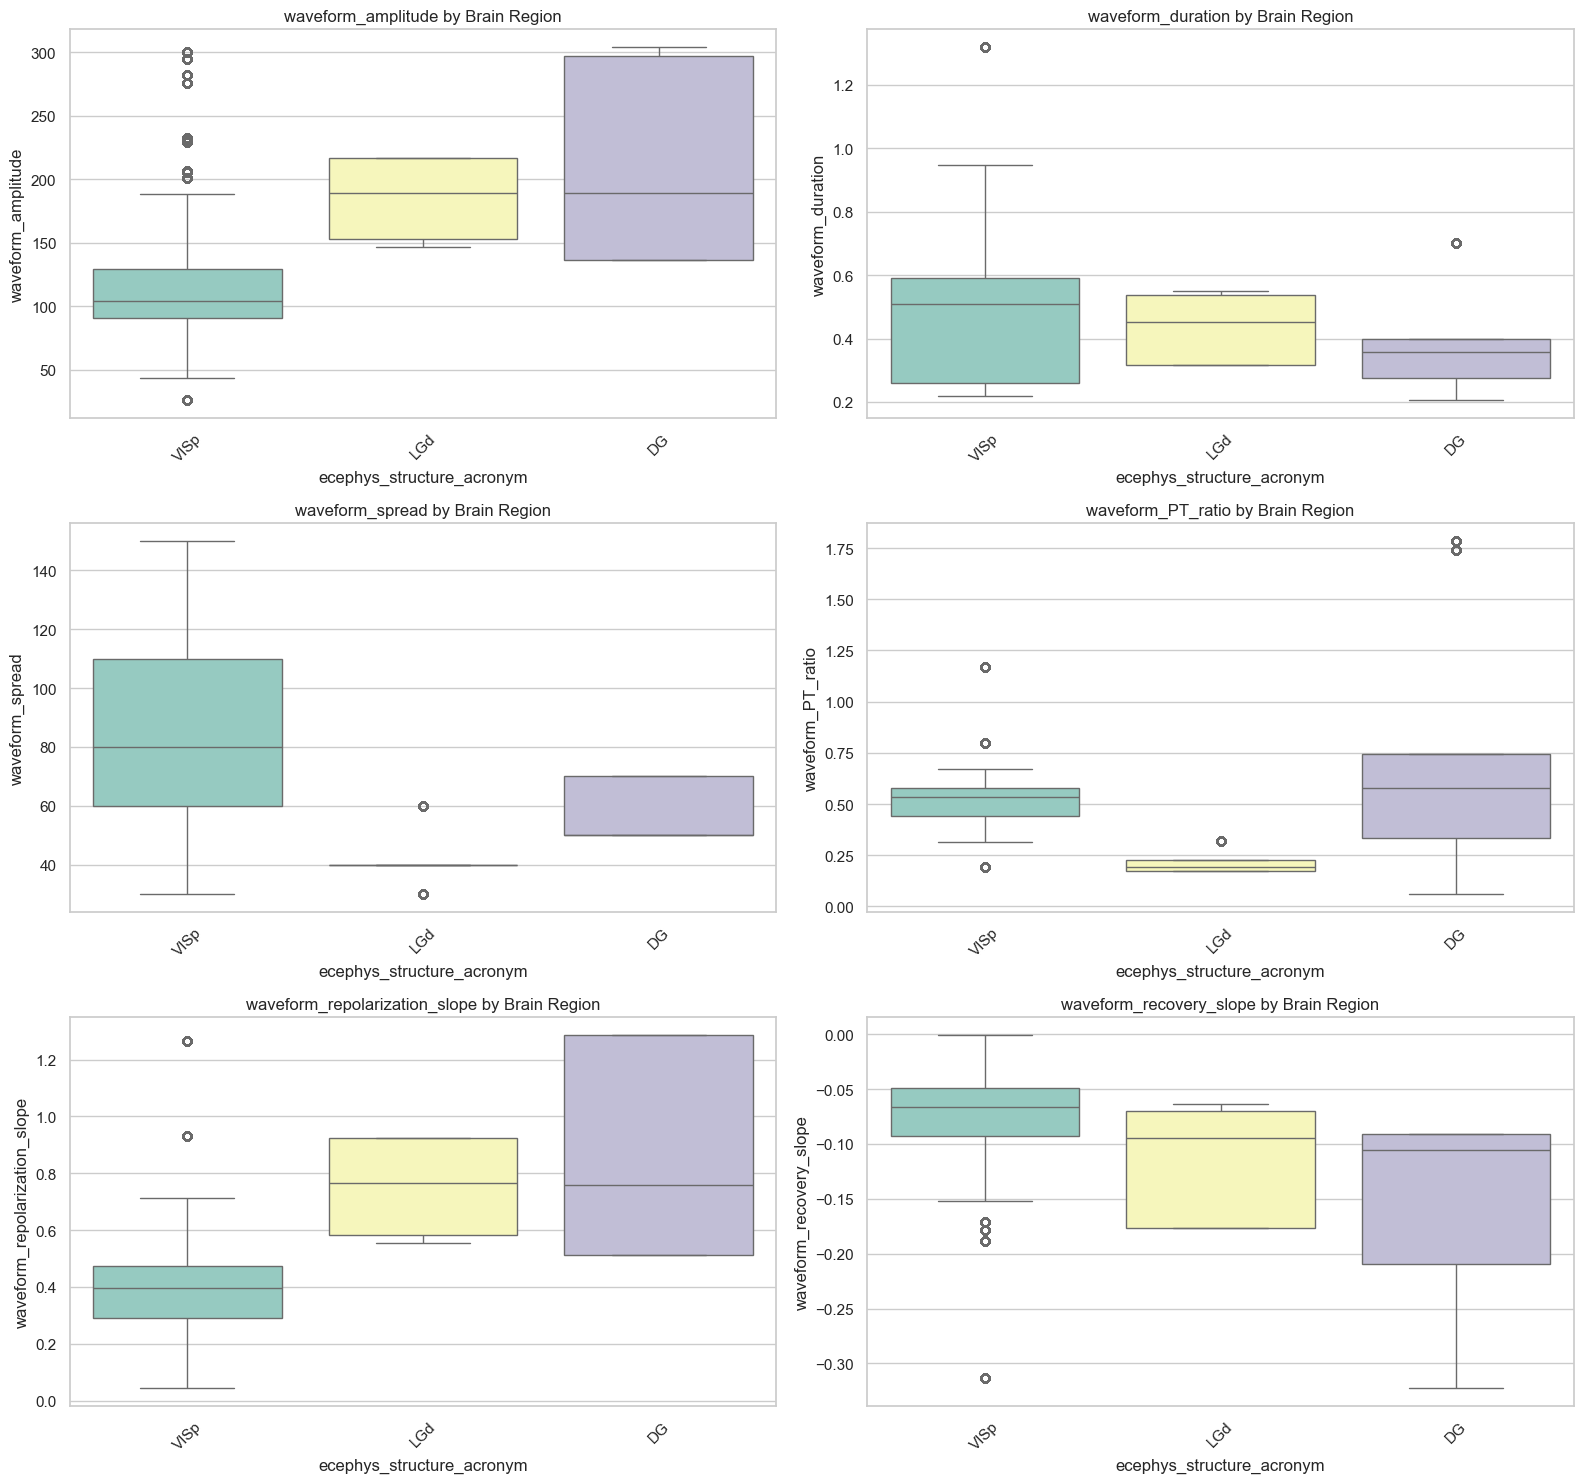

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
axes = axes.flatten()

for i, feature in enumerate(waveform_features):
    ax = axes[i]
    sns.boxplot(
        data=df,
        x='ecephys_structure_acronym',
        y=feature,
        hue='ecephys_structure_acronym',
        palette='Set3',
        legend=False,
        ax=ax
    )
    ax.set_title(f"{feature} by Brain Region")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('image.png')
plt.show()

Looking at these boxplots comparing waveform characteristics across three brain regions (VISp, LGd, and DG), we can observe distinct electrophysiological signatures for each region:

**VISp (Primary Visual Cortex)**
The VISp region shows lower-amplitude, longer-duration signals. The waveform data for VISp has the greatest variability throughout, as can be seen by the longer whiskers in all the plots.

**LGd (Lateral Geniculate Nucleus)**
The LGd region mostly falls in between the VISp and DG regions. In contrast, it has particularly low PT ratios, as well as a smaller spread in waveforms.

**DG (Dentate Gyrus)**
The DG area has high-amplitude and short-duration signals. This is obvious from the waveform amplitude and duration plot, but can also be seen in the steep repolarization and recovery slopes. It also demonstrates more consistent response within the parameters, identified by its narrower distribution in several measures.


These distinct electrophysiological profiles likely reflect the different roles these regions play in neural processing. These differences suggest an underlying difference in the way these regions are observed to react to stimuli.

## Stimulus Response Patterns

- checking firing rate vs stimulus
- check tuning curves for firing_rate
- check response variability

['drifting_gratings' 'static_gratings']
['drifting_gratings' 'static_gratings']
['drifting_gratings' 'static_gratings']
[]


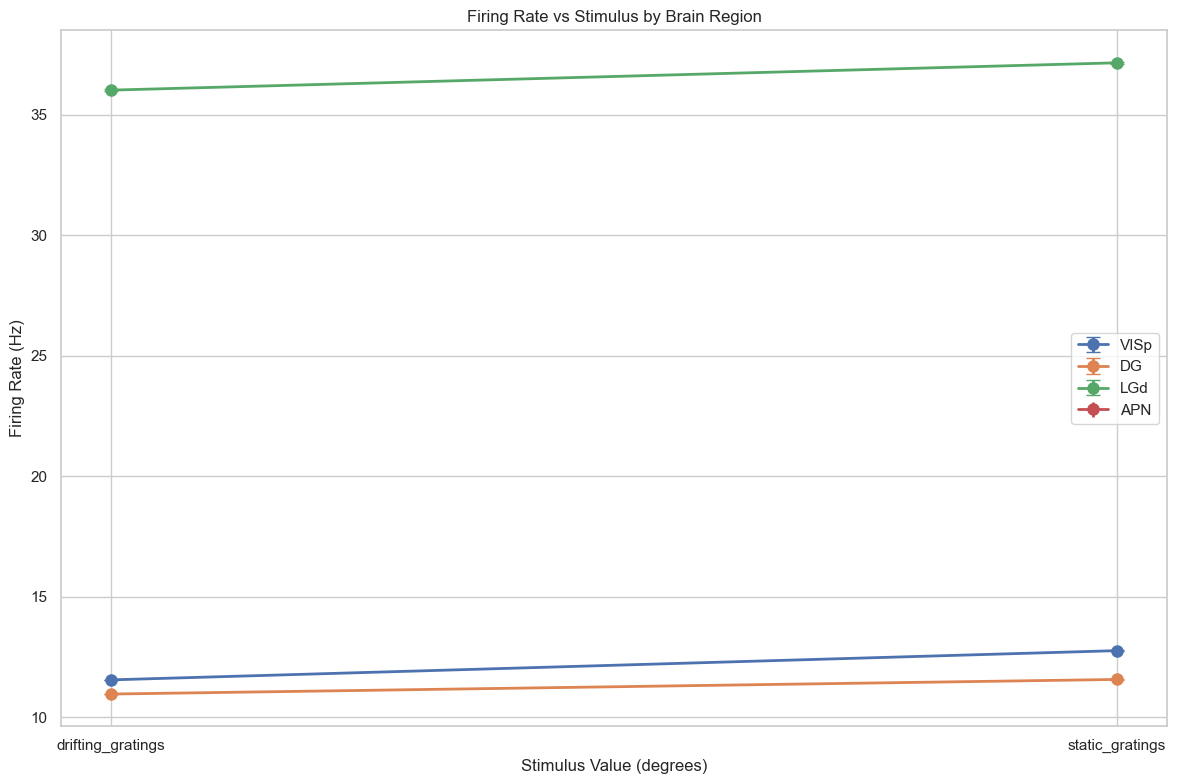

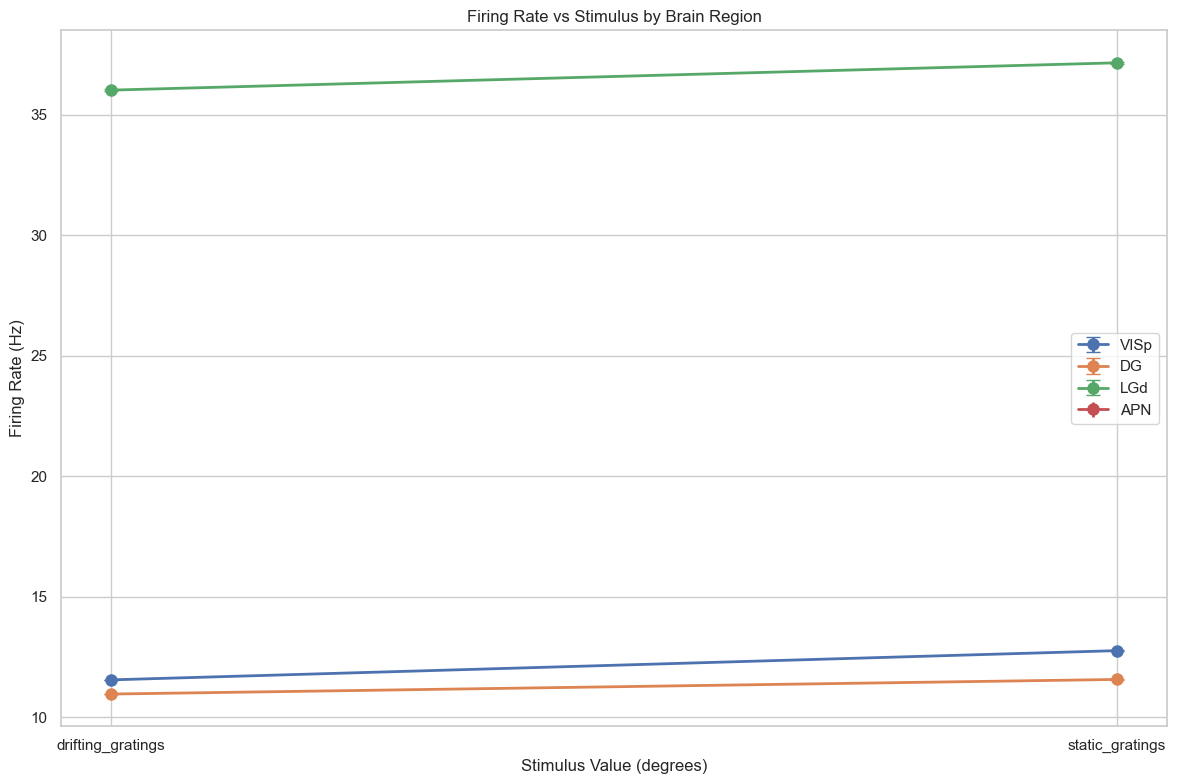

In [15]:
def analyze_firing_rate_vs_stimulus(data):
    """
    Plot firing rate as a function of stimulus values for each brain region
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for region in REGIONS:
        region_data = data[data['ecephys_structure_acronym'] == region]
        
        # Calculate mean and SEM of firing rate for each stimulus value
        grouped = region_data.groupby('stimulus_name')['firing_rate'].agg(['mean', 'sem']).reset_index()
        print(grouped['stimulus_name'].unique())
        
        # Plot with error bars
        ax.errorbar(grouped['stimulus_name'], grouped['mean'], yerr=grouped['sem'], 
                   label=region, marker='o', markersize=8, capsize=5, linewidth=2)
    
    ax.set_xlabel('Stimulus Value (degrees)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Firing Rate vs Stimulus by Brain Region')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return fig

analyze_firing_rate_vs_stimulus(df)